# Introdução à Julia

Para começar, vamos conhecer a IDE.

 - Abra o julia: No terminal, use o comando
````bash
julia
````
 - Abra o Atom
 - E este é o Jupyter notebook, que você abre no terminal com o comando
````bash
jupyter notebook
````

No Jupyter notebook alternamos entre texto e comandos (neste caso do Julia).
Os mesmos comandos funcionam no julia aberto pelo terminal.

In [1]:
2+2

4

In [2]:
3^5

243

In [3]:
v = rand(5)

5-element Array{Float64,1}:
 0.233082 
 0.713417 
 0.0413653
 0.0938712
 0.344527 

In [4]:
e = ones(3)

3-element Array{Float64,1}:
 1.0
 1.0
 1.0

In [5]:
z = zeros(5)

5-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0

In [6]:
A = rand(3,5)

3x5 Array{Float64,2}:
 0.646172  0.45207   0.098689  0.250165  0.84764  
 0.718022  0.502188  0.907593  0.667043  0.0544315
 0.462119  0.515851  0.267858  0.123696  0.50823  

In [7]:
G = chol(A*A')

3x3 UpperTriangular{Float64,Array{Float64,2}}:
 1.18858  0.835929  0.858154
 0.0      1.15785   0.195873
 0.0      0.0       0.224072

In [8]:
b = A*(A'*e)

3-element Array{Float64,1}:
 3.42627
 3.9771 
 2.78913

$$ AA^Tx = b \qquad \mbox{e} \qquad
G^TG = AA^T \qquad
\Longrightarrow \qquad x = G^{-1}G^{-T}b $$

In [9]:
x = G\(G'\b)

3-element Array{Float64,1}:
 1.0
 1.0
 1.0

In [10]:
x-e

3-element Array{Float64,1}:
 -8.43769e-15
 -2.10942e-15
  1.35447e-14

In [11]:
n = 5

5

In [12]:
A = zeros(n,n)
for i = 1:n
    for j = 1:n
        A[i,j] = i + j - 1
    end
end
println("A = \n$A")

A = 
[1.0 2.0 3.0 4.0 5.0
 2.0 3.0 4.0 5.0 6.0
 3.0 4.0 5.0 6.0 7.0
 4.0 5.0 6.0 7.0 8.0
 5.0 6.0 7.0 8.0 9.0]


In [13]:
# Uma função que soma todos os elementos de A
function soma_tudo(A)
    soma = 0.0
    (m,n) = size(A)
    for i = 1:m
        for j = 1:n
            soma += A[i,j]
        end
    end
    return soma
end

soma_tudo (generic function with 1 method)

In [14]:
soma_tudo(A)

125.0

In [15]:
f(x) = x^2 - 5x + 6

f (generic function with 1 method)

In [16]:
f(2)

0

In [17]:
f(3)

0

In [18]:
f(4)

2

In [19]:
f(1)

2

In [20]:
function integral(f, a, b)
    N = 50
    I = (f(a) + f(b))/2
    h = (b-a)/N
    for i = 1:N-1
        I += f(a + i*h)
    end
    return I*h
end

integral (generic function with 1 method)

In [21]:
integral(f, 0, 1) - (1/3 - 5/2 + 6)

6.666666666710341e-5

In [22]:
integral(x->exp(x), 0, 1) - (exp(1) - 1)

5.7275679112400724e-5

## Argumentos opcionais

In [23]:
function integral2(f, a, b, N = 50)
    I = (f(a) + f(b))/2
    h = (b-a)/N
    for i = 1:N-1
        I += f(a + i*h)
    end
    return I*h
end

integral2 (generic function with 2 methods)

In [24]:
integral2(x->exp(x), 0, 1, 1000) - (exp(1) - 1)

1.43190151069561e-7

## Argumentos por palavra-chave

In [25]:
function integral3(f, a, b; N = 50)
    I = (f(a) + f(b))/2
    h = (b-a)/N
    for i = 1:N-1
        I += f(a + i*h)
    end
    return I*h
end

integral3 (generic function with 1 method)

In [26]:
integral3(x->exp(x), 0, 1, N = 1000) - (exp(1) - 1)

1.43190151069561e-7

## Besteira estética

O Julia aceita vários caracteres especiais, e alguns tem significa especial.
Para acessar uma grande parte deles podemos usar a definição do LaTeX e apertar o 
TAB para completar o símbolo.

Muitas vezes usar o símbolo na variável facilita o entendimento.

Note ainda que para usar esse símbolo no editor, o editor precisa estar configurado para isso.

In [27]:
π #\pi

π = 3.1415926535897...

In [28]:
α = 1e-2 #\alpha

0.01

In [29]:
A = rand(5,5)
∇f(x) = 0.5*dot(x, A*x) #\nabla

∇f (generic function with 1 method)

In [30]:
∇f(ones(5))

6.675001456284365

In [31]:
ξ(v,l,u) = max(l, min(u, v)) #\xi

ξ (generic function with 1 method)

In [32]:
l = rand(5); u = rand(5) + l; x = rand(5)./rand(5)

5-element Array{Float64,1}:
  0.949705 
  0.918432 
  1.40426  
  0.0446653
 14.7248   

In [33]:
l .<= v .<= u

5-element BitArray{1}:
 false
 false
 false
 false
 false

In [34]:
w = ξ(x,l,u)

5-element Array{Float64,1}:
 0.981501
 0.918432
 1.04227 
 0.722256
 0.591968

In [35]:
l .<= w .<= u

5-element BitArray{1}:
 true
 true
 true
 true
 true

In [36]:
x₀ = zeros(5) # x\_0

5-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0

In [37]:
3 ∈ [2, 4, 5] # \in

false

In [38]:
[2, 3]∪[1, 5] #\cup

4-element Array{Int64,1}:
 2
 3
 1
 5

## Tipos

Julia não precisa de declaração de tipos, inclusive às vezes não passar o tipo de um objeto facilita a otimização do compilador.
No entanto, todo objeto tem um tipo, e existe uma hierarquia de tipos.
Alguns tipos são abstratos, servindo de conexão entre os tipos, e alguns são concretos, como Int, Float64 e ASCIIString.

In [39]:
typeof(0)

Int64

In [40]:
typeof(0.0)

Float64

In [41]:
typeof("")

ASCIIString

In [42]:
typeof(rand(3))

Array{Float64,1}

In [43]:
typeof((2,3.0))

Tuple{Int64,Float64}

In [44]:
[2, 3.0]

2-element Array{Float64,1}:
 2.0
 3.0

In [45]:
[2, 3.0, "a"]

3-element Array{Any,1}:
 2   
 3.0 
  "a"

Alguns tipos tem apelidos para facilitar o uso.

In [46]:
Int

Int64

In [47]:
Vector

Array{T,1}

In [48]:
Vector{Int}

Array{Int64,1}

In [49]:
Matrix

Array{T,2}

In [50]:
typeof(rand(3,3))

Array{Float64,2}

In [51]:
typeof(3//4)

Rational{Int64}

## Funções para tipos específicos

In [52]:
function estranha(x::Int)
    return x + 1
end

function estranha(x::Float64)
    return x - 1
end

estranha (generic function with 2 methods)

In [53]:
estranha(0)

1

In [54]:
estranha(0.0)

-1.0

In [55]:
estranha("")

LoadError: LoadError: MethodError: `estranha` has no method matching estranha(::ASCIIString)
while loading In[55], in expression starting on line 1

Note que algumas funções são "chatas":

In [56]:
sqrt(-1)

LoadError: LoadError: DomainError:
sqrt will only return a complex result if called with a complex argument. Try sqrt(complex(x)).
while loading In[56], in expression starting on line 1

In [57]:
sqrt(Complex(-1))

0.0 + 1.0im

Temos ainda os tipos especiais, úteis, mas que podem deixar seu código lento:

In [58]:
(2^32)^4

0

In [59]:
BigInt(2^32)^4

340282366920938463463374607431768211456

In [60]:
1e-100^10

0.0

In [61]:
BigFloat(1e-100)^10

1.000000000000000199918998026028854181900205164437319696086145393068052250525208e-1000

## Plots

In [62]:
Pkg.add("Winston")
using Winston

INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of Winston
INFO: Use `Pkg.update()` to get the latest versions of your packages
INFO: Recompiling stale cache file /home/abel/.julia/lib/v0.4/Cairo.ji for module Cairo.
INFO: Recompiling stale cache file /home/abel/.julia/lib/v0.4/Colors.ji for module Colors.
INFO: Recompiling stale cache file /home/abel/.julia/lib/v0.4/FixedPointNumbers.ji for module FixedPointNumbers.
INFO: Recompiling stale cache file /home/abel/.julia/lib/v0.4/ColorTypes.ji for module ColorTypes.
INFO: Recompiling stale cache file /home/abel/.julia/lib/v0.4/Reexport.ji for module Reexport.
INFO: Recompiling stale cache file /home/abel/.julia/lib/v0.4/Graphics.ji for module Graphics.


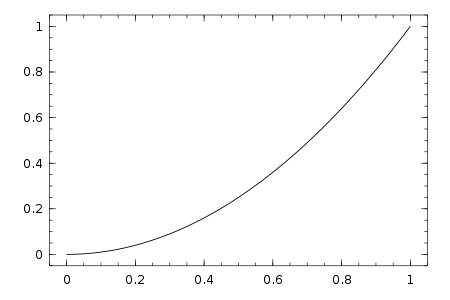

In [63]:
t = linspace(0, 1, 100);
plot(t, t.^2)

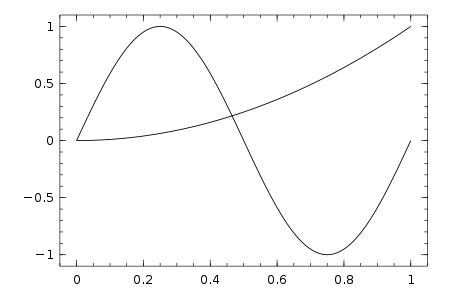

In [64]:
oplot(t, sin(2π*t))

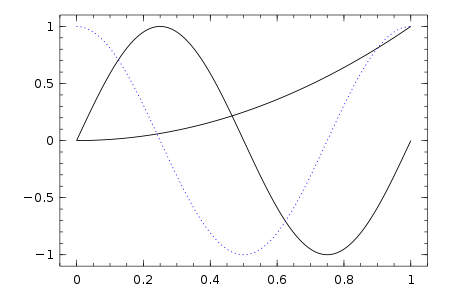

In [65]:
oplot(t, cos(2π*t), "b:")

In [66]:
p = FramedPlot()
colors = ["blue", "red", "green"]
for i = 1:3
    add(p, Curve(t, t.^i, color=colors[i]))
    add(p, Points(rand(10), rand(10), color=colors[i]))
end
savefig(p, "teste.png", "width", 500, "height", 500)

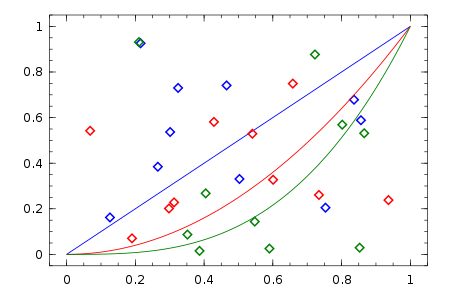

In [67]:
display(p)

## Coisas incomuns para MatLab

Alguns coisas comuns em outras linguagens, tipo o Python.

In [68]:
# Para cada elemento de um conjunto
for x in ["blue", "red", "green"]
    println("color $x")
end

color blue


In [69]:
# Tuplas
(a, b) = (2,3)
println("a = $a, b = $b")

In [70]:
# For com tupla
for (i,x) in enumerate(["blue", "red", "green"])
    println("color Nᵒ$i: $x")
end

In [71]:
# Operador ternário
F(n::Int) = n < 2 ? 1 : F(n-1)*n
for n = 1:6
    println("$(n)! = $(F(n))")
end

In [72]:
# Short-circuit
function bhaskara(a, b, c)
    a == 0 && error("Primeiro argumento não pode ser 0")
    Δ = b^2 - 4a*c
    Δ = Δ >= 0 ? sqrt(Δ) : sqrt(Complex(Δ))
    return (-b+Δ)/2a, (-b-Δ)/2a
end

bhaskara (generic function with 1 method)

In [73]:
bhaskara(0, 0, 1)

LoadError: LoadError: Primeiro argumento não pode ser 0
while loading In[73], in expression starting on line 1

In [74]:
# Compreensão de vetor
[i^2 for i = 1:5]

5-element Array{Int64,1}:
  1
  4
  9
 16
 25

In [75]:
[log(x) for x = 1:4]

4-element Array{Float64,1}:
 0.0     
 0.693147
 1.09861 
 1.38629 

In [77]:
[1//(i+j-1) for i = 1:4, j = 1:4]

4x4 Array{Rational{Int64},2}:
 1//1  1//2  1//3  1//4
 1//2  1//3  1//4  1//5
 1//3  1//4  1//5  1//6
 1//4  1//5  1//6  1//7

# Exercícios

## exp(x)

Usando a definição

$$ e^x = 1 + x + \frac{x^2}{2} + \frac{x^3}{3!} + \dots $$

implemente a função `exponencial(x)` que retorna $e^x$.

## Método da bissecção

Implemente `bisseccao(f, a, b)` que busca por $x$ tal que
$f(x) = 0$ no intervalo $[a,b]$. É possível fazer esse
exercício em pouquíssimas linhas, usando atribuição de tuplas
e o operador ternário.

## Fatorial corretamente

Melhore a implementação do fatorial para não usar recursão.

## Número de Fibonacci

Implemente `fibo(n)` que encontra $F_n, n \geq 1$, onde
$$ F_{n+1} = F_n + F_{n-1}, F_1 = F_2 = 1. $$
Faça de duas maneiras: Uma em uma linha, e outra eficiente.

## Método de Euler para PVI

Implemente o metodo `eulerpvi(f, t0, y0, t)` que encontra uma aproximação
para $y(t)$, onde
$$ y'(t) = f(t,y), \quad t > t_0, \qquad y(t_0) = y_0, $$
usando o método de Euler
$$ v_{n+1} = v_n + hf(t_n,v_n), \qquad
v_0 = y_0. $$

## LU

Implemente a fatoração LU.

## Rota mínima por força bruta

Dados uma lista de pontos
`[(x1,y1), (x2,y2), \dots, (xn,yn)]`,
encontre a rota que passa por todos os pontos exatamente
uma vez e que percorre a menor distância.

Para gerar uma lista desse tipo, você pode fazer
`L = [(rand(),rand()) for i = 1:n]`.
Faça o gráfico desses pontos e do percurso.

**Atenção:** Se $n$ for muito grande, o computador
irá travar.